<a href="https://colab.research.google.com/github/Geoffrey-Chege/GEOFFREY_CHEGE_MORINGA_IPW8_HYPOTHYROIDISM/blob/main/GEOFFREY_CHEGE_MORINGA_IPW8_HYPOTHYROIDISM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Introduction

## 1.1 Defining the Research Question

I aim to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroidISM.

## 1.2 Metrics for Success

* Achieve accuracy above 85%




## 1.3 The Context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 




## 1.4 Experimental design taken

* Loading & Viewing the Data
* Data Cleaning
* Exploratory Data Analysis
* Feature Engineering
* Modelling:
    * Random Forest Classifier
    * Ada Boost Classifier
    * Gradient Boosting Classifier
    * Support Vector Classifier
* Conclusion


## 1.5 Appropriateness of the available Data

Dataset link: http://bit.ly/hypothyroid_data


# 2 Importing Libraries

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 25.9 MB 710 kB/s
     |████████████████████████████████| 10.9 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 33.0 MB/s 
     |████████████████████████████████| 102 kB 11.1 MB/s 
     |████████████████████████████████| 675 kB 44.3 MB/s 
     |████████████████████████████████| 4.7 MB 34.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 41.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=d37245407d50f4ee25d6c75a3a71b818f6a83d75d508fb8446c139020780647c
  Stored in directory: /tmp/pip-ephem-wheel-cache-650uk7i2/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=c3fd325b905f2ab4f3252bd4da9a428ae22cb9858e3dda40200bf0397da75646
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [2]:
!pip install pydataset
from pydataset import data

     |████████████████████████████████| 15.9 MB 509 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=5e30c4f9df5e52b45cc07c14edf32a628fc03039ea6bdaa1a9609e003022745e
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [6]:
# Import python Libraries to be used in analysis

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import pandas_profiling as pp

import warnings
warnings.filterwarnings('ignore')

# 3 Loading and previewing the dataset

In [7]:
# Creating a DataFrame 'hypo' from the dataset 

hypo = pd.read_csv('/content/hypothyroid.csv')


In [8]:
# Displaying the head of the dataset

hypo.head()

status age sex on_thyroxine  ... FTI_measured FTI TBG_measured TBG
0  hypothyroid  72   M            f  ...            y  10            n   ?
1  hypothyroid  15   F            t  ...            y  17            n   ?
2  hypothyroid  24   M            f  ...            y   0            n   ?
3  hypothyroid  24   F            f  ...            y   6            n   ?
4  hypothyroid  77   M            f  ...            y  44            n   ?

[5 rows x 26 columns]

In [9]:
# Displaying the tail of the dataset

hypo.tail()

status age sex on_thyroxine  ... FTI_measured  FTI TBG_measured TBG
3158  negative  58   F            f  ...            y   95            n   ?
3159  negative  29   F            f  ...            y   98            n   ?
3160  negative  77   M            f  ...            y  104            n   ?
3161  negative  74   F            f  ...            y  137            n   ?
3162  negative  56   F            t  ...            y  143            n   ?

[5 rows x 26 columns]

In [10]:
# Checking the number of rows and columns in the dataset

print('The dataset has ' + str(hypo.shape[0]) + ' rows and ' +  str(hypo.shape[1]) + ' columns' )

The dataset has 3163 rows and 26 columns


In [11]:
# checking the column names

hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [12]:
# Checking information about the dataset

hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

All the columns are string data types. A model cannot be run using string, this will be corrected in data cleaning.



In [13]:
# Checking for unique values in each column with a for loop  

for column in hypo.columns:       
  print("Column: " + column)
  print("Unique Values:")
  print(hypo[column].unique())
  print("Number of unique values: " + str(hypo[column].nunique()))
  print('\n++++++++++++++++++++++++++++++++++++++++++++++++++++++\n')

Column: status
Unique Values:
['hypothyroid' 'negative']
Number of unique values: 2

++++++++++++++++++++++++++++++++++++++++++++++++++++++

Column: age
Unique Values:
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
Number of unique values: 93

++++++++++++++++++++++++++++++++++++++++++++++++++++++

Column: sex
Unique Values:
['M' 'F' '?']
Number of unique values: 3

++++++++++++++++++++++++++++++++++++++++++++++++++++++

Column: on_thyroxine
Unique Values:
['f' 't']
Number of unique values: 2

++++++++++++++++++++++++++++++++++++++++++++++++++++++

Column: query_on_thyroxine


The data has special character (?) which appears in the following columns:
  * Age
  * Sex
  * TSH
  * T3
  * TT4
  * T4U
  * FTI
  * TBG

This will be addressed in data cleaning.

# 4 DATA CLEANING 

## 4.1 Missing Values

In [14]:
# Checking number of null values

hypo.isnull().sum().sum()

0

There are no null values but the special character '?' is in some columns. It will be replaced with null values.

In [15]:
# Replacing '?' with null values 

hypo = hypo.replace(['?'], np.nan)

In [16]:
# Checking number of null values after replacing '?'

hypo.isnull().sum().sum()

5329

In [17]:
# Checking number of null values per column

hypo.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [18]:
# Changing the columns data types by creating two lists
# A list of categorical columns
# A list of numerical columns

categorical = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
               'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
               'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
               'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
  
numerical = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each column into the appropriate data type

for col in hypo.columns:
  if col in numerical:
    hypo[col]= pd.to_numeric(hypo[col])
  
  else:
    hypo[col] = hypo[col].astype('category')
    
    
# checking data types to confirm changes

hypo.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

The columns have appropriate data types

The age column will be filled with the mean

In [19]:
# Filling the missing values in the age column with mean age

hypo['age']= hypo['age'].fillna(hypo['age'].mean(), axis = 0)

The 'sex' column will be filled with the mode

In [20]:
# Filling the missing values in the sex column with modal sex

hypo['sex']= hypo['sex'].fillna(hypo['sex'].mode()[0])

In [21]:
# Checking the null values in the measured columns

hypo.head(50)

status        age sex  ...   FTI TBG_measured   TBG
0   hypothyroid  72.000000   M  ...  10.0            n   NaN
1   hypothyroid  15.000000   F  ...  17.0            n   NaN
2   hypothyroid  24.000000   M  ...   0.0            n   NaN
3   hypothyroid  24.000000   F  ...   6.0            n   NaN
4   hypothyroid  77.000000   M  ...  44.0            n   NaN
5   hypothyroid  85.000000   F  ...  23.0            n   NaN
6   hypothyroid  64.000000   F  ...  63.0            n   NaN
7   hypothyroid  72.000000   F  ...  32.0            n   NaN
8   hypothyroid  20.000000   F  ...  32.0            n   NaN
9   hypothyroid  42.000000   F  ...   7.5            n   NaN
10  hypothyroid  69.000000   F  ...  61.0            n   NaN
11  hypothyroid  75.000000   F  ...  41.0            n   NaN
12  hypothyroid  72.000000   F  ...  76.0            n   NaN
13  hypothyroid  53.000000   F  ...  45.0            n   NaN
14  hypothyroid  59.000000   F  ...  34.0            n   NaN
15  hypothyroid  68.000000   M  ...  81.0            n   NaN
16  hypothyroid  50.000000   F  ...  11.0            n   NaN
17  hypothyroid  78.000000   F  ...  16.0            n   NaN
18  hypothyroid  65.000000   F  ...  11.0            n   NaN
19  hypothyroid  28.000000   F  ...  46.0            n   NaN
20  hypothyroid  43.000000   M  ...   0.0            n   NaN
21  hypothyroid  68.000000   F  ...  22.0            n   NaN
22  hypothyroid  72.000000   M  ...   0.0            n   NaN
23  hypothyroid  77.000000   F  ...  12.0            n   NaN
24  hypothyroid  40.000000   F  ...   5.0            y  28.0
25  hypothyroid  84.000000   F  ...  47.0            n   NaN
26  hypothyroid  51.154214   M  ...  41.0            n   NaN
27  hypothyroid  83.000000   F  ...  29.0            n   NaN
28  hypothyroid  63.000000   F  ...  37.0            n   NaN
29  hypothyroid  73.000000   M  ...  60.0            n   NaN
30  hypothyroid  36.000000   F  ...   8.4            n   NaN
31  hypothyroid  59.000000   F  ...   8.5            n   NaN
32  hypothyroid  50.000000   F  ...  60.0            n   NaN
33  hypothyroid  65.000000   F  ...  24.0            n   NaN
34  hypothyroid  24.000000   F  ...  28.0            n   NaN
35  hypothyroid  27.000000   F  ...  12.0            n   NaN
36  hypothyroid  48.000000   F  ...  11.0            n   NaN
37  hypothyroid  40.000000   F  ...   7.0            y  28.0
38  hypothyroid  71.000000   M  ...  46.0            n   NaN
39  hypothyroid  77.000000   F  ...  49.0            n   NaN
40  hypothyroid  50.000000   M  ...  36.0            n   NaN
41  hypothyroid  60.000000   M  ...  34.0            n   NaN
42  hypothyroid  50.000000   F  ...  15.0            n   NaN
43  hypothyroid  34.000000   F  ...   9.0            n   NaN
44  hypothyroid  51.154214   F  ...  80.0            n   NaN
45  hypothyroid  79.000000   F  ...  37.0            n   NaN
46  hypothyroid  62.000000   M  ...  53.0            n   NaN
47  hypothyroid  74.000000   M  ...   7.2            n   NaN
48  hypothyroid  60.000000   F  ...  68.0            n   NaN
49  hypothyroid  32.000000   M  ...  17.0            n   NaN

[50 rows x 26 columns]

In instances where the tests were not measured, there are null values because no test was taken. They will be filled with zero

In [22]:
# filling the measured columns with 0
measured = ['TSH','T3','TT4','T4U','FTI','TBG']

hypo[measured] =hypo[measured].fillna(0)


In [23]:
hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## 4.2 Duplicates

In [24]:
# checking for duplicates

hypo.duplicated().sum()

77

There are 77 duplicates which will be dropped.

In [25]:
# Dropping duplicates 

hypo.drop_duplicates(inplace = True)

# Checking changes

hypo.duplicated().sum()

0

## 4.3 Outliers


### Boxplots

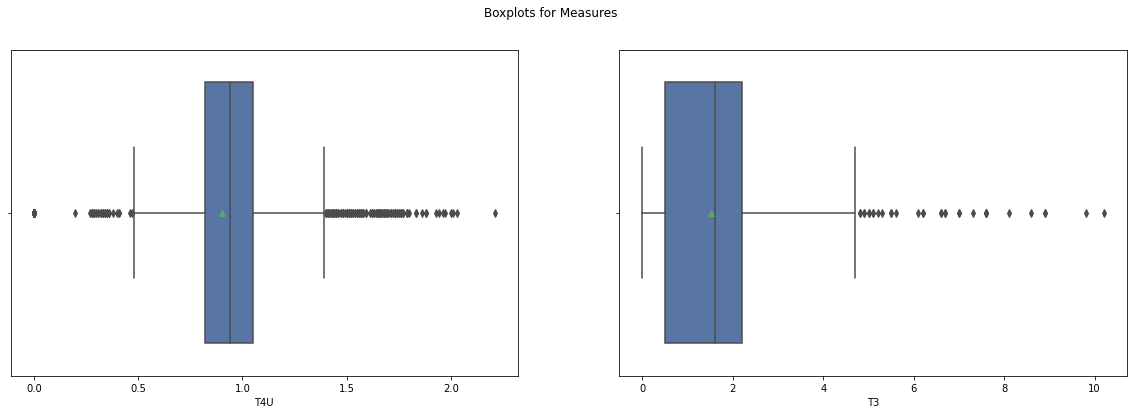

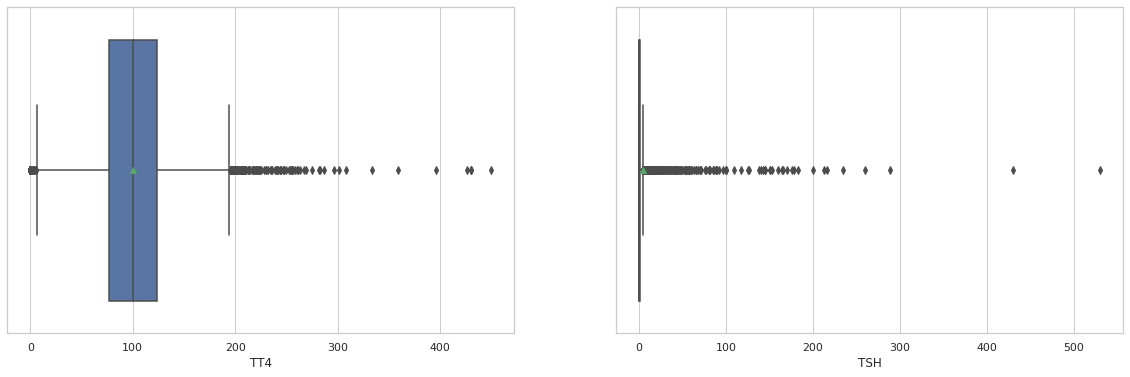

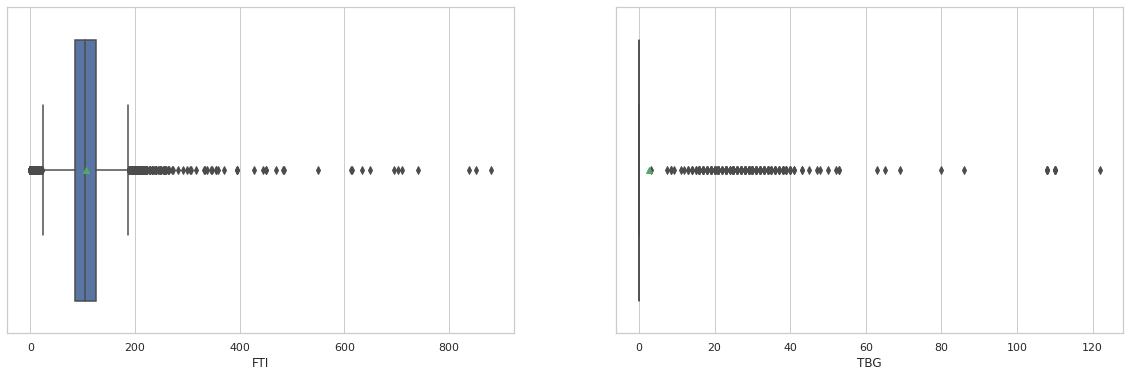

In [26]:
# Using boxplots to check for outliers in the measured values

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
fig.suptitle('Boxplots for Measures')
sns.set(style = 'whitegrid', context = 'notebook')
sns.boxplot(x = hypo['T4U'], ax=ax1, showmeans = True)
sns.boxplot(x = hypo['T3'], ax=ax2, showmeans = True)

fig, (ax3,ax4) = plt.subplots(1,2, figsize=(20, 6))
sns.boxplot(x = hypo['TT4'], ax=ax3, showmeans = True)
sns.boxplot(x = hypo['TSH'], ax=ax4, showmeans = True)

fig, (ax5,ax6) = plt.subplots(1,2, figsize=(20, 6))
sns.boxplot(x = hypo['FTI'], ax=ax5, showmeans = True)
sns.boxplot(x = hypo['TBG'], ax=ax6, showmeans = True)

plt.show()

* T4U, TT4 and FTI have outliers on both sides of the boxplots.
* TSH, T3 and TBG have outliers on the right side of the boxplots.

The outliers will not be removed at this stage

# 5 EDA

In [27]:
hypo_report = pp.ProfileReport(hypo)
hypo_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 6 MODELING 

## PART 1

### 6.1 Random Forest

In [28]:
# To create the model, data is first split into features and labels:

X= hypo.drop('status', axis = 1)

# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hypo.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
 
# Fitting the model, making predictions and evaluating the model

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split=10, max_depth=5)

forest = forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy_score(y_test, y_pred)

0.990280777537797

The model is 99% accurate.

This model is too good. It could be overfitting.

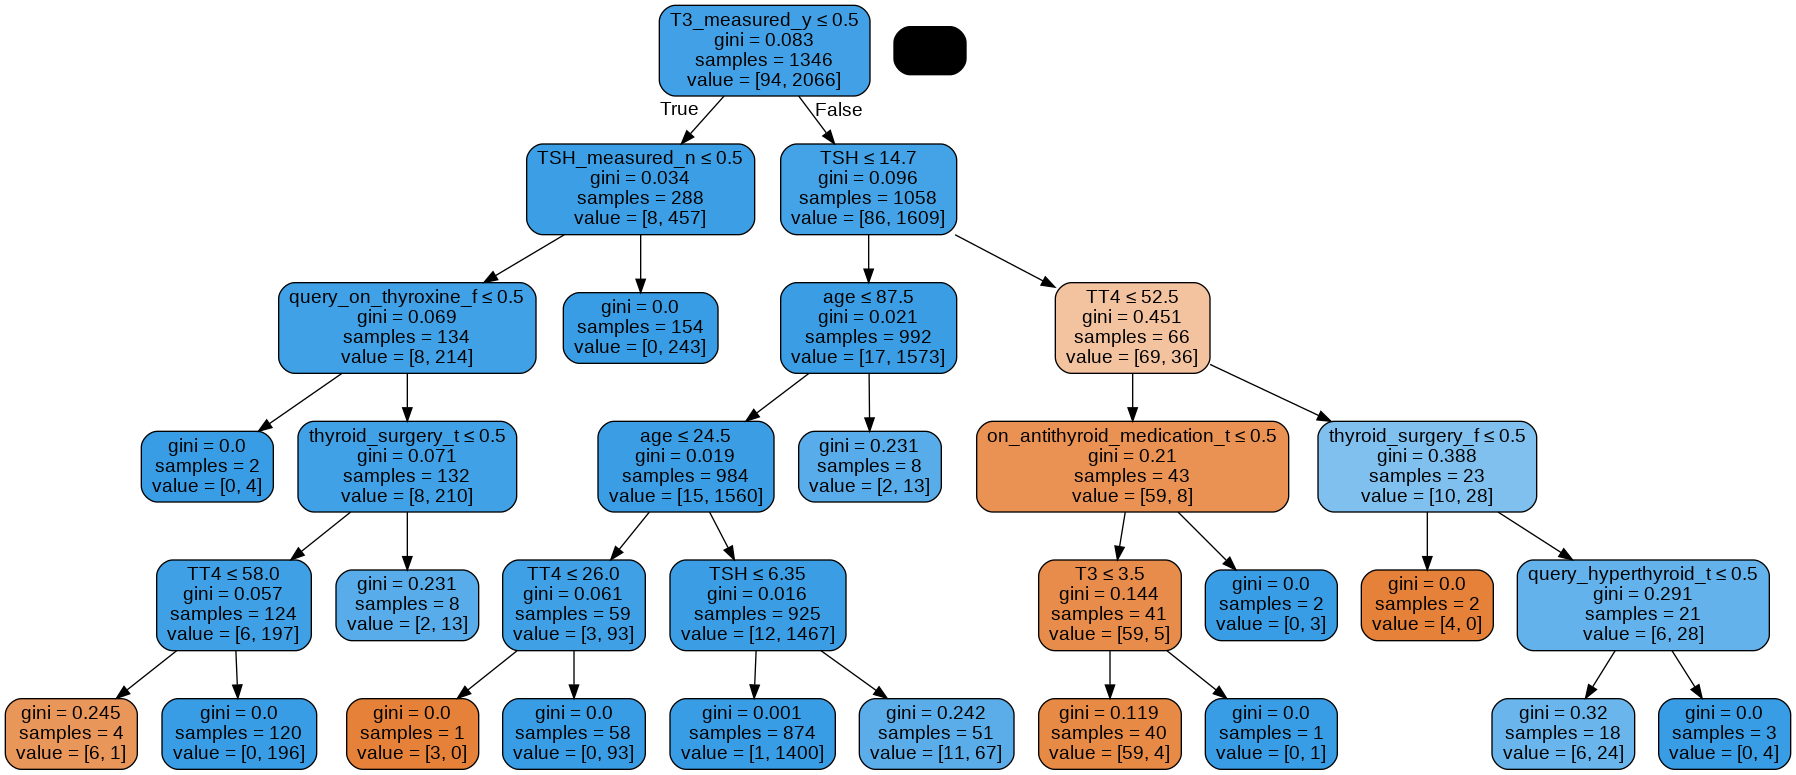

In [29]:
# Visualizing any tree: 15

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking tree 15 from the forest
tree = forest.estimators_[15]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

In [30]:
# Feature importance

# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# printing feature inportances
print(feature_importances) 
print()

# Sorting the values in descending order, since we want to see the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('TSH', 0.64), ('T3', 0.01), ('TT4', 0.26), ('T4U', 0.0), ('FTI', 0.0), ('TBG', 0.0), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.0), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.0), ('on_antithyroid_medication_t', 0.04), ('thyroid_surgery_f', 0.04), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('TSH_measured_n', 0.0), ('TSH_measured_y', 0.0), ('T3_measured_n', 0.0), ('T3_measured_y', 0.01), ('TT4_measured_n', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_n', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_n', 0.0), ('FTI_measured_y', 0.0), ('TBG_measured_n', 0.0), ('TBG_measured_y', 0.0)]

Variable:

In [31]:
# Using the TSH feature only to build a prediction model

# Splitting the data into Features set and Labels

X= hypo.TSH.values.reshape(-1,1)

# Encoding the target variable from strings to numericals
           
y = hypo.status.cat.codes

# Splitting the data again into training and test sets   

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Fitting the model, making predictions and evaluating the model

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split=10, max_depth=5)

forest = forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy_score(y_test, y_pred)

0.9740820734341252

97.4% accuracy using most important feature TSH.

### 6.2 Gradient boosting Classifier



In [32]:
# Splitting the data into Features set and Labels

X= hypo.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hypo.status.cat.codes

# Splitting the data again into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

gbc = GradientBoostingClassifier(n_estimators= 200, learning_rate=0.1, max_depth=3, 
                                 min_samples_split=10)
# Fitting the model, making predictions and evaluating the model

gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

accuracy_score(y_test, y_pred_gbc)

0.9946004319654428

The model yielded 99.46% accuracy slightly higher than Random Forest Classifier model. This might still be overfitting.

### 6.3 Ada Boost Classifier




In [33]:
# Splitting the data into Features set and Labels

X= hypo.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hypo.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=300)
                         

abc = abc.fit(X_train, y_train)

y_pred = abc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9924406047516199

The Ada Boost Classifier yielded 99.24%, slightly lower than Gradient Boosting Classifier. This might still be overfitting.

## PART 2

### 6.4 Support Vector Machine

#### Using Linear kernel

In [34]:
# Splitting the data into Features set and Labels

X= hypo.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hypo.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'linear',  C = 1, gamma = 0.001)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9892008639308856

Linear kernel yielded 98.92% accuracy.

#### Using a polynomial kernel

In [35]:
# Splitting the data into Features set and Labels

X= hypo.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hypo.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'poly', C = 1, gamma = 0.001)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9913606911447084

Polynomial kernel yielded 99.1% accuracy, slightly higher than linear kernel.

#### Using rbf kernel

In [36]:
# Splitting the data into Features set and Labels

X= hypo.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hypo.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'rbf', C = 1, gamma = 0.001)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9848812095032398

rbf kernel yielded 98.49% accuracy, the lowest accuracy compared to the other two kernels.

#### Visualization with TT4 and TSH

Polynomial kernel is the most accurate SVC. We shall use it to visualize TSH and TT4, the most important features from random forest.

In [37]:
# Splitting the data into Features set and Labels

X= hypo[['TSH','TT4']].values

# Encoding the target variable from strings to numericals
           
y = hypo.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

svc = SVC(kernel = 'poly', C = 1, gamma = 0.001)

svc = svc.fit(X_train, y_train)

# Fitting the model, making predictions and evaluating the model
y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9665226781857451

The accuracy of Polynomial kernel while using the most important features, TSH and TT4, is 96.65%

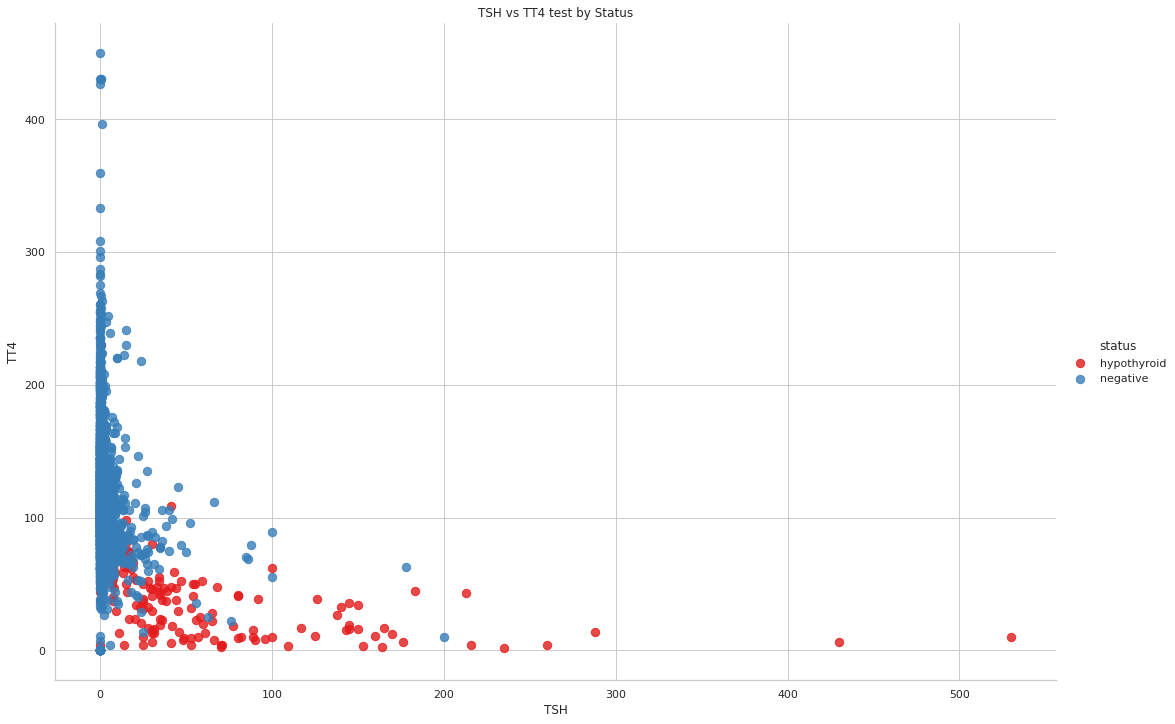

In [47]:
# Plotting desired features

sns.lmplot('TSH','TT4', data=hypo, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70}, height=10, aspect=1.5)
plt.title('TSH vs TT4 test by Status')
plt.show()

The plot shows how TSH and TT4 determine hypothyroidism status.

# 7 Conclusion

* In part 1, Gradient Boosting and Ada Boost Classifier models performed best with 99.46% and 99.24% accuracy respectively.

* The most important features to use for the prediction were TSH and TT4.

* In part 2, Support Vector Classifier using the polynomial kernel had 96.65% accuracy.
